In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 11)

In [6]:
data = pd.get_dummies(data = data ,columns=['Geography','Gender',],drop_first=True)

In [7]:
x = data.drop(['Exited'],axis =1)
y = data[['Exited']]

In [8]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [9]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x= obj.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = .2,random_state=1)

In [34]:
xtrain

array([[-0.23310044, -0.94607926, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [-0.25379399, -0.94607926, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.39864885,  0.77028538,  0.34135195, ...,  1.72790383,
        -0.57380915, -1.09598752],
       ...,
       [ 0.22215769,  0.5795782 ,  1.37868567, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 0.12903671,  0.00745665,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.16371428,  0.29351742,  0.34135195, ...,  1.72790383,
        -0.57380915,  0.91241915]])

In [18]:
 conda install -c conda-forge tensorflow 


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: / warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.1.0              |     pyhd8ed1ab_0         105 KB  conda-forge
    arrow-cpp-16.1.0           |       hbc20fb2_0         8.1 MB
    astunparse-1.6.3           |     pyhd8ed1ab_2          18 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.9.2               |  py312h81bd7bf_0         1.1 MB  conda-forge
    flatbuffers-24.3.25        |       h313beb8_0         1.3 MB
    gast-0.5.5                 |     pyhd8ed1ab_0          23 KB  conda-forge
    giflib-5.2.2               |       h93a5062_0          70 KB  con

In [20]:
import tensorflow
#from tensorflow import keras
from keras.layers import Dense
from keras import Sequential


In [21]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [24]:
history = model.fit(xtrain,ytrain,epochs = 100,validation_split = .2 )

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5560 - loss: 0.6912 - val_accuracy: 0.7969 - val_loss: 0.4742
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8073 - loss: 0.4552 - val_accuracy: 0.8044 - val_loss: 0.4440
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7970 - loss: 0.4443 - val_accuracy: 0.8031 - val_loss: 0.4276
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8121 - loss: 0.4303 - val_accuracy: 0.8112 - val_loss: 0.4131
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8176 - loss: 0.4134 - val_accuracy: 0.8238 - val_loss: 0.3993
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8374 - loss: 0.3909 - val_accuracy: 0.8306 - val_loss: 0.3852
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8373 - loss: 0.3860 - val_accuracy: 0.8338 - val_loss: 0.3740
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8539 - loss: 0

In [25]:
model.layers[1].get_weights()

[array([[-0.34023455,  0.33506313,  0.36096174, -0.14719938, -0.53691506,
          0.43832394, -0.5979411 ,  0.43270403, -0.2662918 , -0.49126232,
          0.01843375],
        [-0.43254063, -0.72131705,  0.21106648, -0.13182785, -0.38146788,
          0.46680558,  0.23332456, -0.02806757, -0.37210733, -1.102297  ,
          0.36796552],
        [ 0.04195745,  0.37931398, -0.00438354,  0.32212034,  0.21992363,
          0.518388  , -0.41077992,  0.13922687, -0.1995104 ,  0.05608393,
         -0.03508548],
        [-0.152537  ,  0.10615683, -0.90772724, -0.8106507 ,  0.413868  ,
         -0.8404218 ,  0.9115594 , -0.3517823 , -0.42407113, -0.11842915,
          0.4791209 ],
        [-0.29623947,  0.0324445 ,  0.39288297, -0.43569207,  0.04238344,
          0.35431778, -0.3671452 , -0.5588301 ,  0.4187424 , -0.20106384,
         -0.42661676],
        [ 0.45772022,  0.4862952 , -0.2743889 , -0.04887874,  0.16629703,
         -0.05461216,  0.23446563,  0.17078547, -0.11767942, -0.0665476

In [26]:
model.layers[0].get_weights()

[array([[ 0.15300058, -0.02836774,  0.2623774 ,  0.05899395, -0.09023163,
         -0.43748343,  0.15864956,  0.01408812,  0.32246056, -0.21224226,
         -0.19204491],
        [-0.38074324,  0.13104866,  0.03365894,  0.93053544,  1.1421629 ,
          0.23229896,  0.00297889,  0.00877667, -0.41282427, -0.30648273,
          0.46812084],
        [ 0.03754613,  0.03127484,  0.35627595,  0.23178911, -0.02891434,
          0.50093997, -0.14151633, -0.09185713, -0.12190346,  0.12419402,
          0.25052333],
        [-0.8908097 ,  0.19918653, -0.88163537,  0.13990659, -0.20819734,
          0.08781987,  0.12522838, -0.81915045, -0.06368877,  0.04303494,
         -0.39476708],
        [-0.7506449 , -0.7358151 ,  0.11502265,  0.9088903 , -0.56072897,
          0.38347867, -0.37756926,  0.79938346, -0.56983745, -0.33341354,
         -0.05307193],
        [-0.02180321,  0.23147911,  0.06841522,  0.12143192, -0.15534072,
          0.8367029 ,  0.24298227,  0.15596288, -0.52672946,  0.2557854

In [27]:
model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


array([[0.02838706],
       [0.08668242],
       [0.04712907],
       ...,
       [0.00828035],
       [0.03086817],
       [0.3716921 ]], dtype=float32)

In [28]:
import numpy as np
predict_y = np.where(model.predict(xtest)>.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict_y)

0.8665

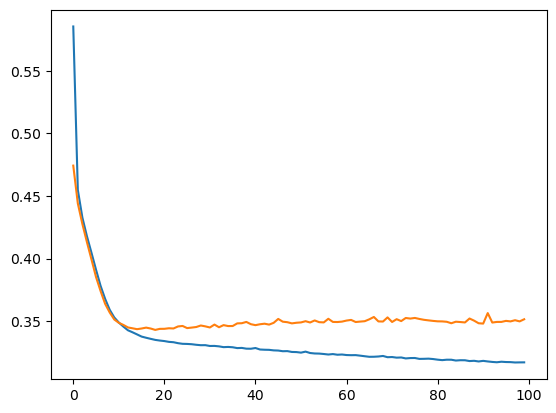

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

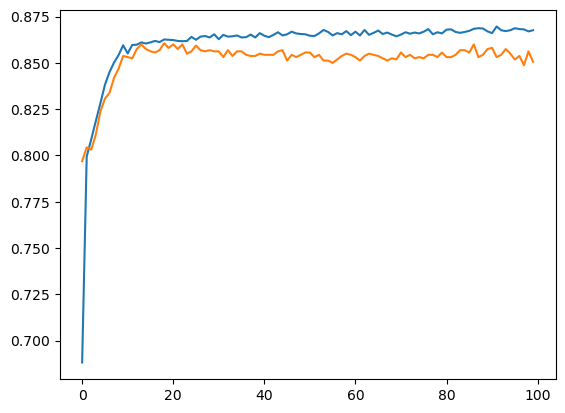

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
import pickle

# Assuming 'model' is your trained model (e.g., Decision Tree, Naive Bayes, etc.)
# Save the model to a file using pickle
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# To load the model back later
with open('saved_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
